<a href="https://colab.research.google.com/github/ChitrakCDB/Cryptocurrency-Trading-Algorithm/blob/main/Cryptocurrency_Trading_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
pip install yfinance

In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [73]:
# Retrieve two weeks of Bitcoin to INR exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_INR = yf.download("BTC-INR", start='2021-01-01', end='2022-01-10', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [74]:
BTC_INR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,2118227.00,2163227.25,2104315.00,2147022.75,2147022.75,2977069369481
2021-01-02,2147191.25,2423382.25,2126340.00,2348254.25,2348254.25,4960436300944
2021-01-03,2348410.75,2529617.25,2342776.00,2395940.25,2395940.25,5749407146511
2021-01-04,2398054.25,2437574.75,2097177.50,2336819.00,2336819.00,5932217878548
2021-01-05,2337193.75,2518591.25,2209558.75,2487166.50,2487166.50,4942319614003


In [75]:
BTC_INR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-06,3242635.75,3257989.00,3177156.50,3211969.75,3211969.75,2248036372851
2022-01-07,3211422.25,3211422.25,3051867.25,3084876.25,3084876.25,6249981533485
2022-01-08,3085140.75,3134871.75,3019312.50,3098125.50,3098125.50,2083510136116
2022-01-09,3098183.75,3167164.75,3068744.50,3112181.75,3112181.75,1581232675666
2022-01-10,3112080.00,3128100.00,2949055.25,3097138.50,3097138.50,2377528686813


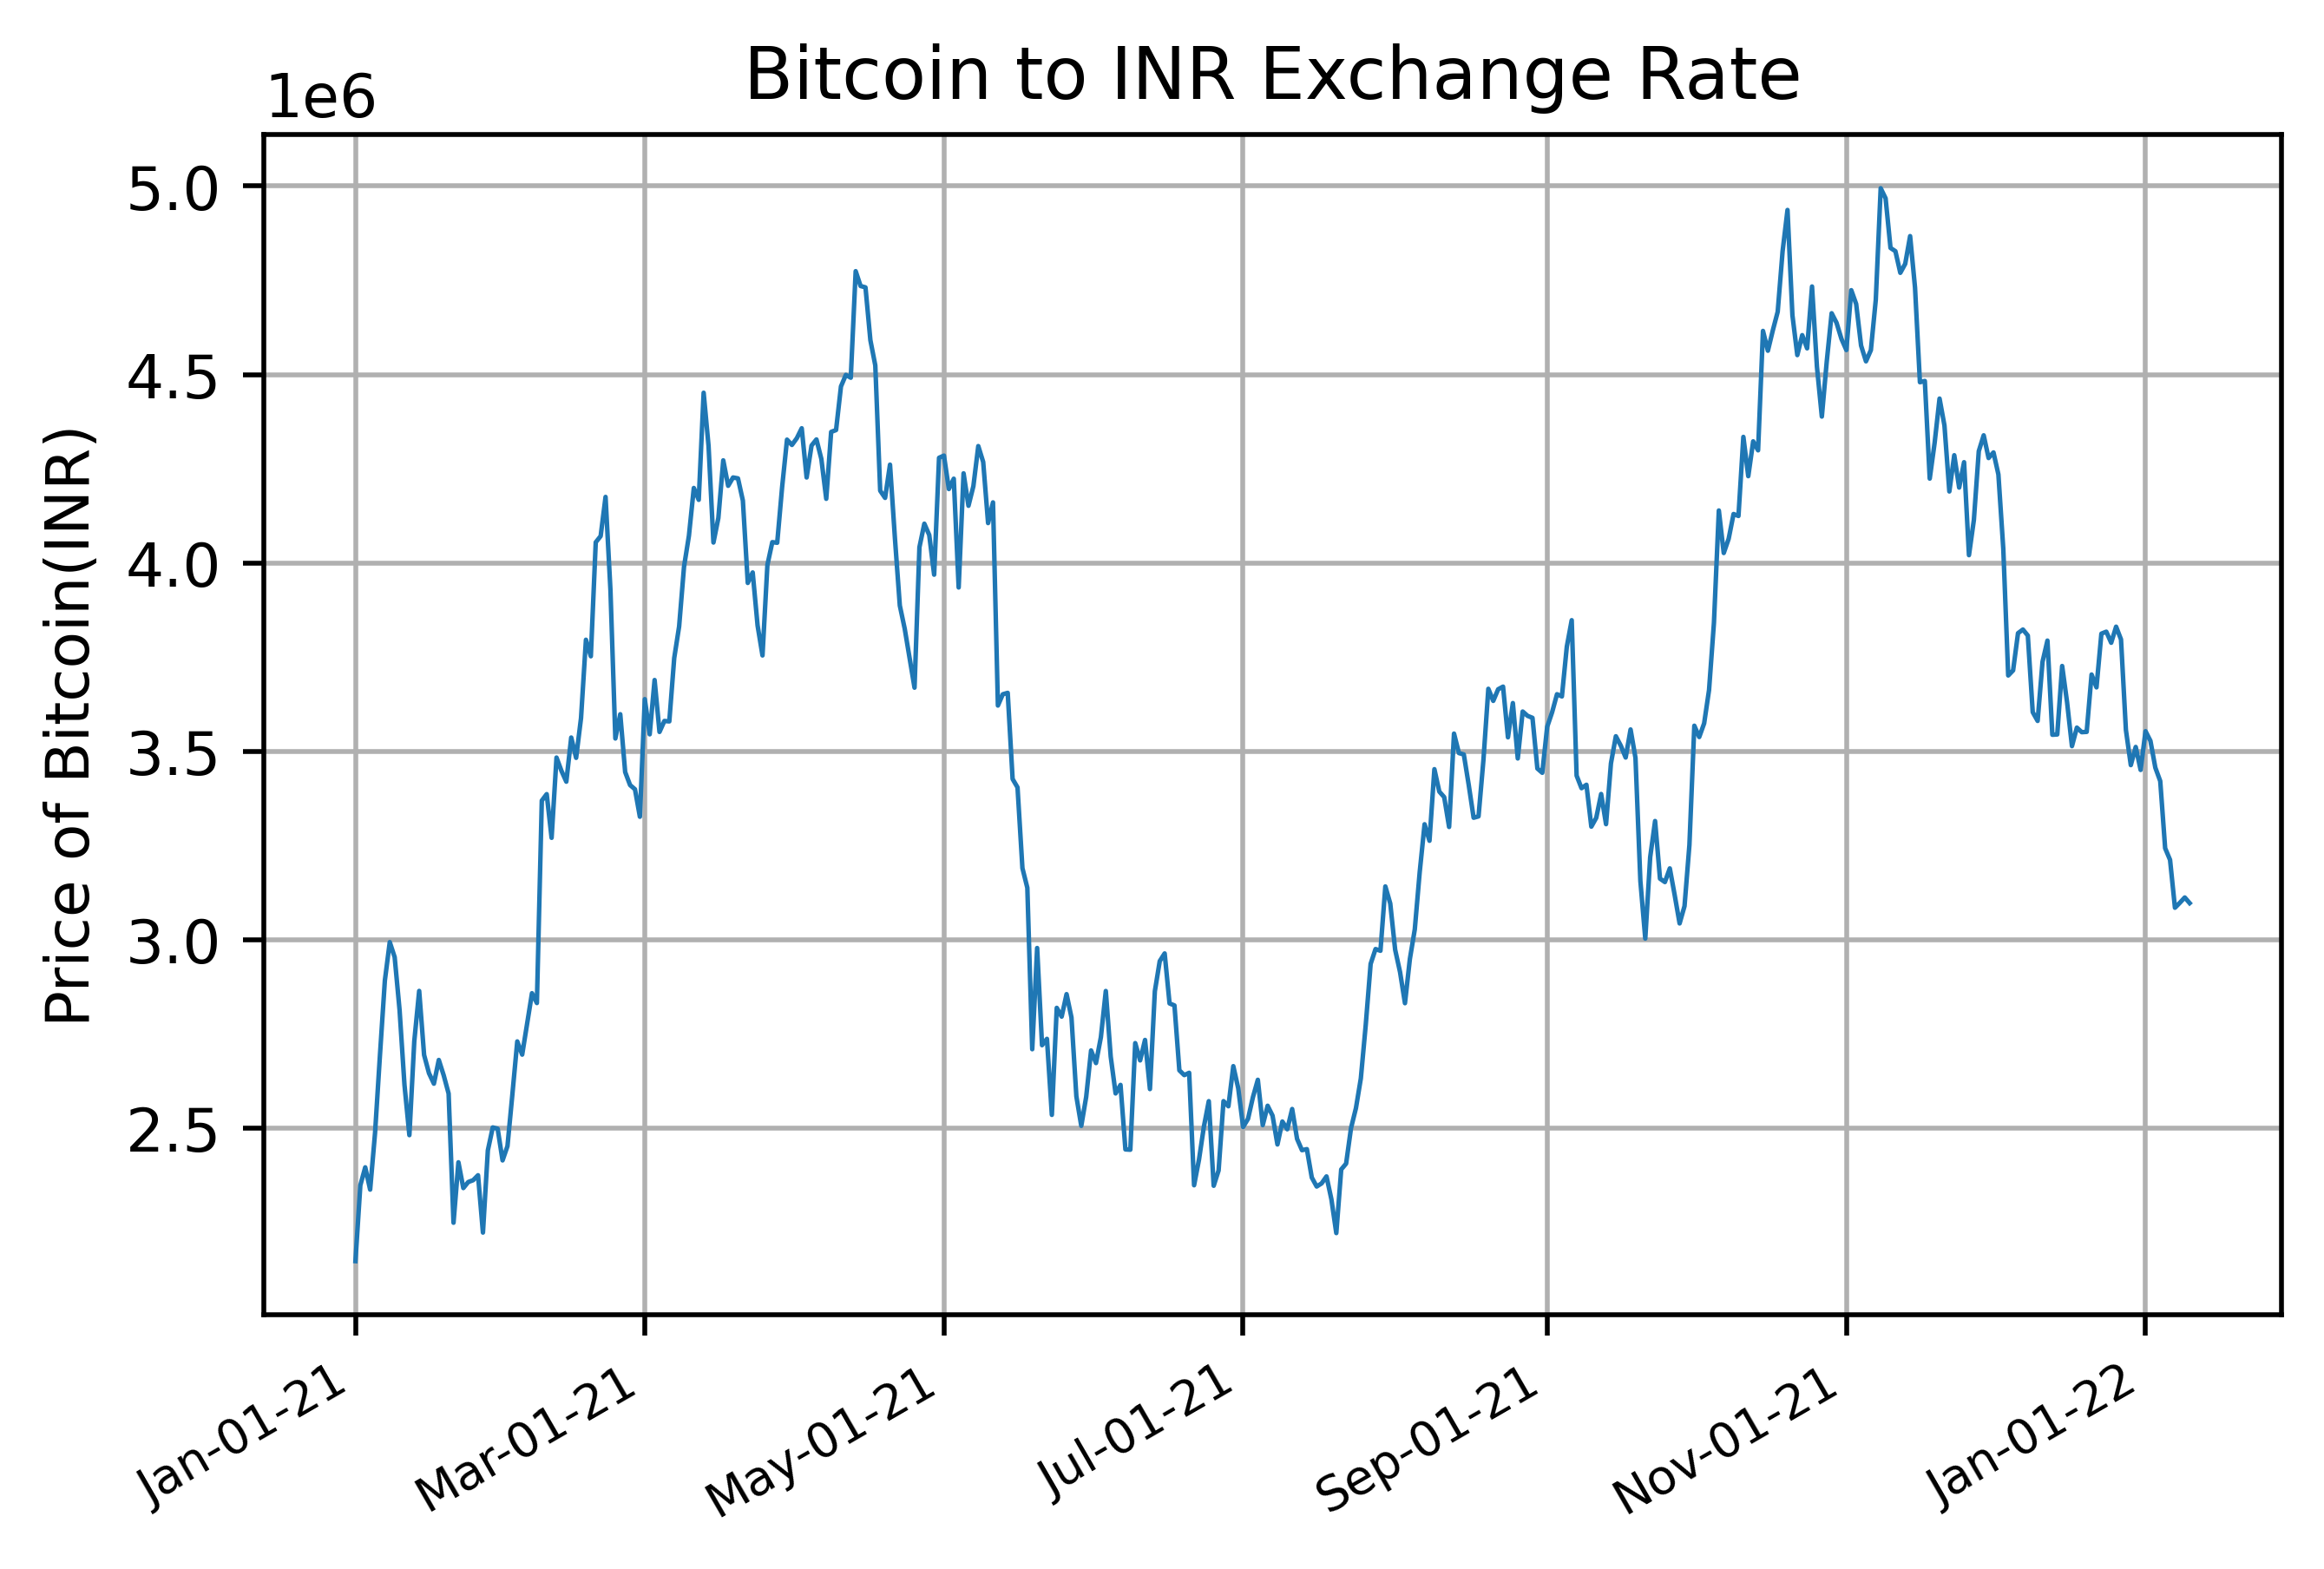

In [76]:
#formatting date axis
fig,ax = plt.subplots(dpi=500)
date_format= DateFormatter('%h-%d-%y')
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x',labelsize=8)
fig.autofmt_xdate()

#plotting closing price
ax.plot(BTC_INR['Close'],lw=0.75)

#adding labels and title
ax.set_ylabel('Price of Bitcoin(INR)')

ax.set_title('Bitcoin to INR Exchange Rate')
ax.grid()#adding Grid

#display the price chart
plt.show()

In [77]:
# Compute a 9-day Simple Moving Average with pandas
BTC_INR['SMA_9'] = BTC_INR['Close'].rolling(window=9, min_periods=1).mean()

In [78]:
# Compute a 30-day Simple Moving Average with pandas
BTC_INR['SMA_30'] = BTC_INR['Close'].rolling(window=30, min_periods=1).mean()

In [79]:
BTC_INR.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2021-01-01,2118227.00,2163227.25,2104315.00,2147022.75,2147022.75,2977069369481,2.147023e+06,2.147023e+06
2021-01-02,2147191.25,2423382.25,2126340.00,2348254.25,2348254.25,4960436300944,2.247638e+06,2.247638e+06
2021-01-03,2348410.75,2529617.25,2342776.00,2395940.25,2395940.25,5749407146511,2.297072e+06,2.297072e+06
2021-01-04,2398054.25,2437574.75,2097177.50,2336819.00,2336819.00,5932217878548,2.307009e+06,2.307009e+06
2021-01-05,2337193.75,2518591.25,2209558.75,2487166.50,2487166.50,4942319614003,2.343041e+06,2.343041e+06


In [80]:
BTC_INR.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-01-06,3242635.75,3257989.00,3177156.50,3211969.75,3211969.75,2248036372851,3.426585e+06,3.598788e+06
2022-01-07,3211422.25,3211422.25,3051867.25,3084876.25,3084876.25,6249981533485,3.384525e+06,3.574709e+06
2022-01-08,3085140.75,3134871.75,3019312.50,3098125.50,3098125.50,2083510136116,3.338580e+06,3.557848e+06
2022-01-09,3098183.75,3167164.75,3068744.50,3112181.75,3112181.75,1581232675666,3.300981e+06,3.542231e+06
2022-01-10,3112080.00,3128100.00,2949055.25,3097138.50,3097138.50,2377528686813,3.250282e+06,3.520882e+06


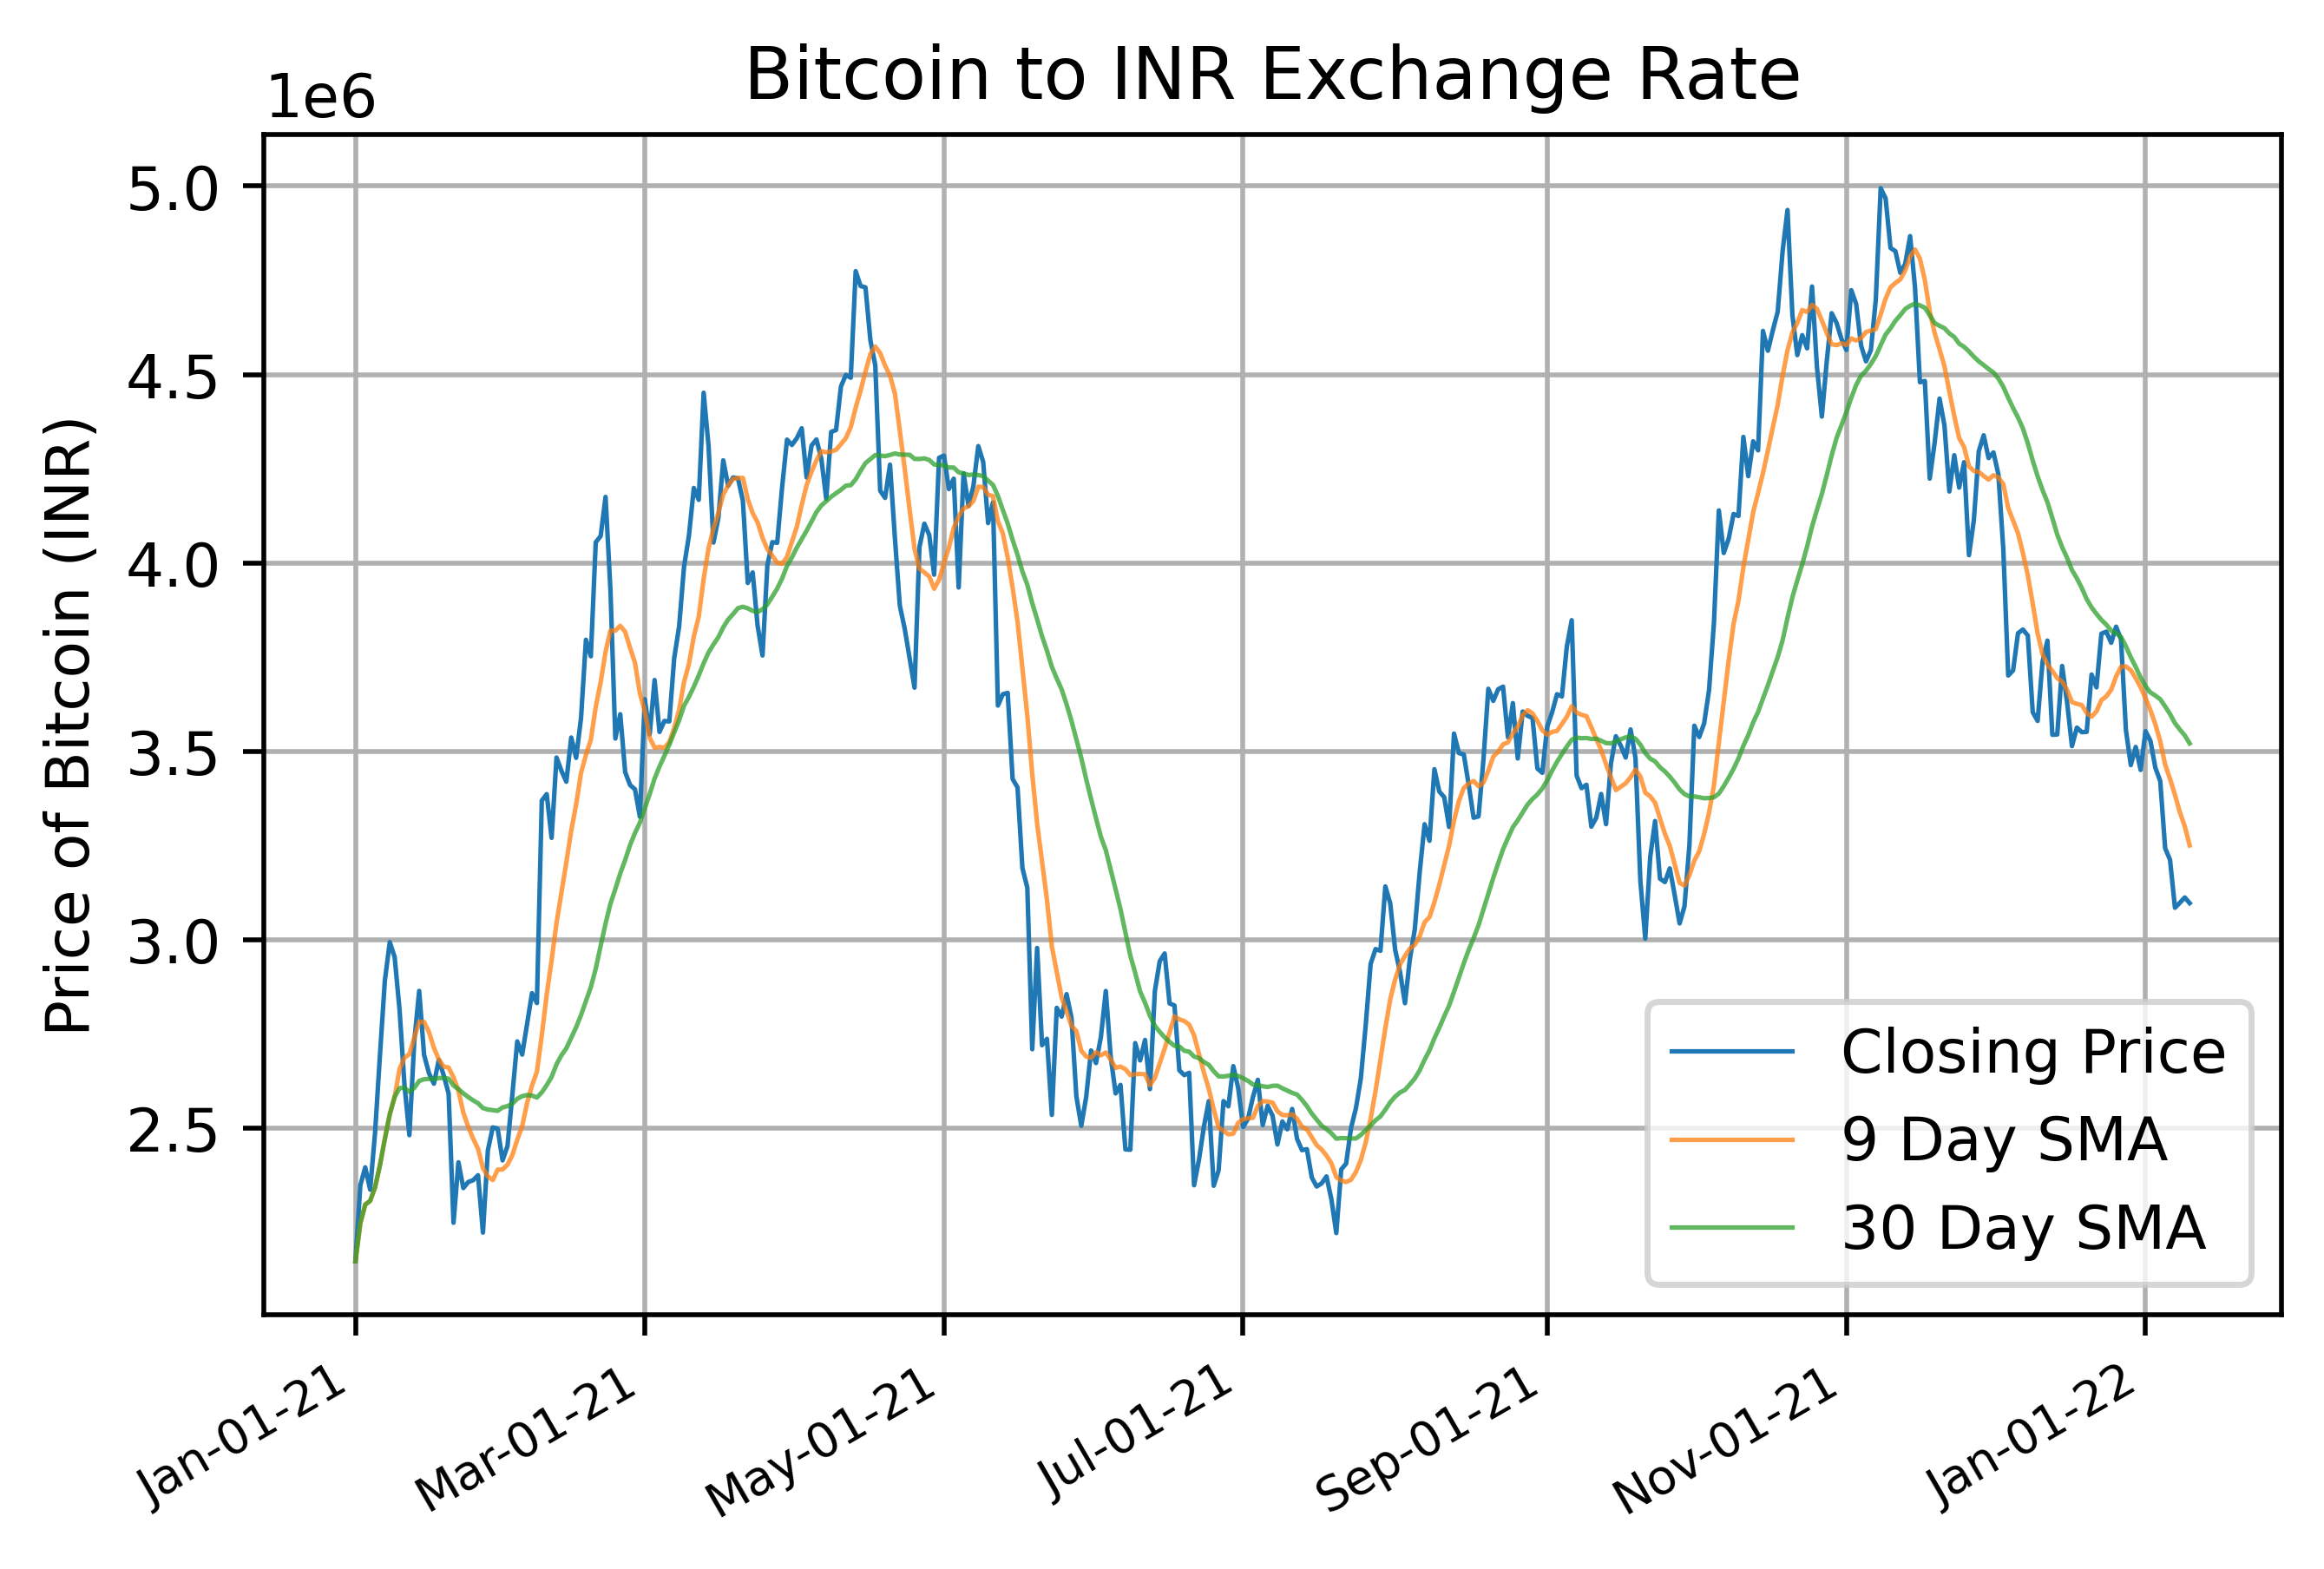

In [81]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_INR['Close'], lw=0.75, label='Closing Price') # Added label
ax.plot(BTC_INR['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_INR['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (INR)')
ax.set_title('Bitcoin to INR Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [82]:
# Create a pandas dataframe that is the same size as the BTC_INR dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_INR.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 7
long_interval = 30

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_INR['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_INR['Close'].rolling(window=long_interval, min_periods=1).mean()

In [83]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

In [84]:
trade_signals['Position']=trade_signals['Signal'].diff()

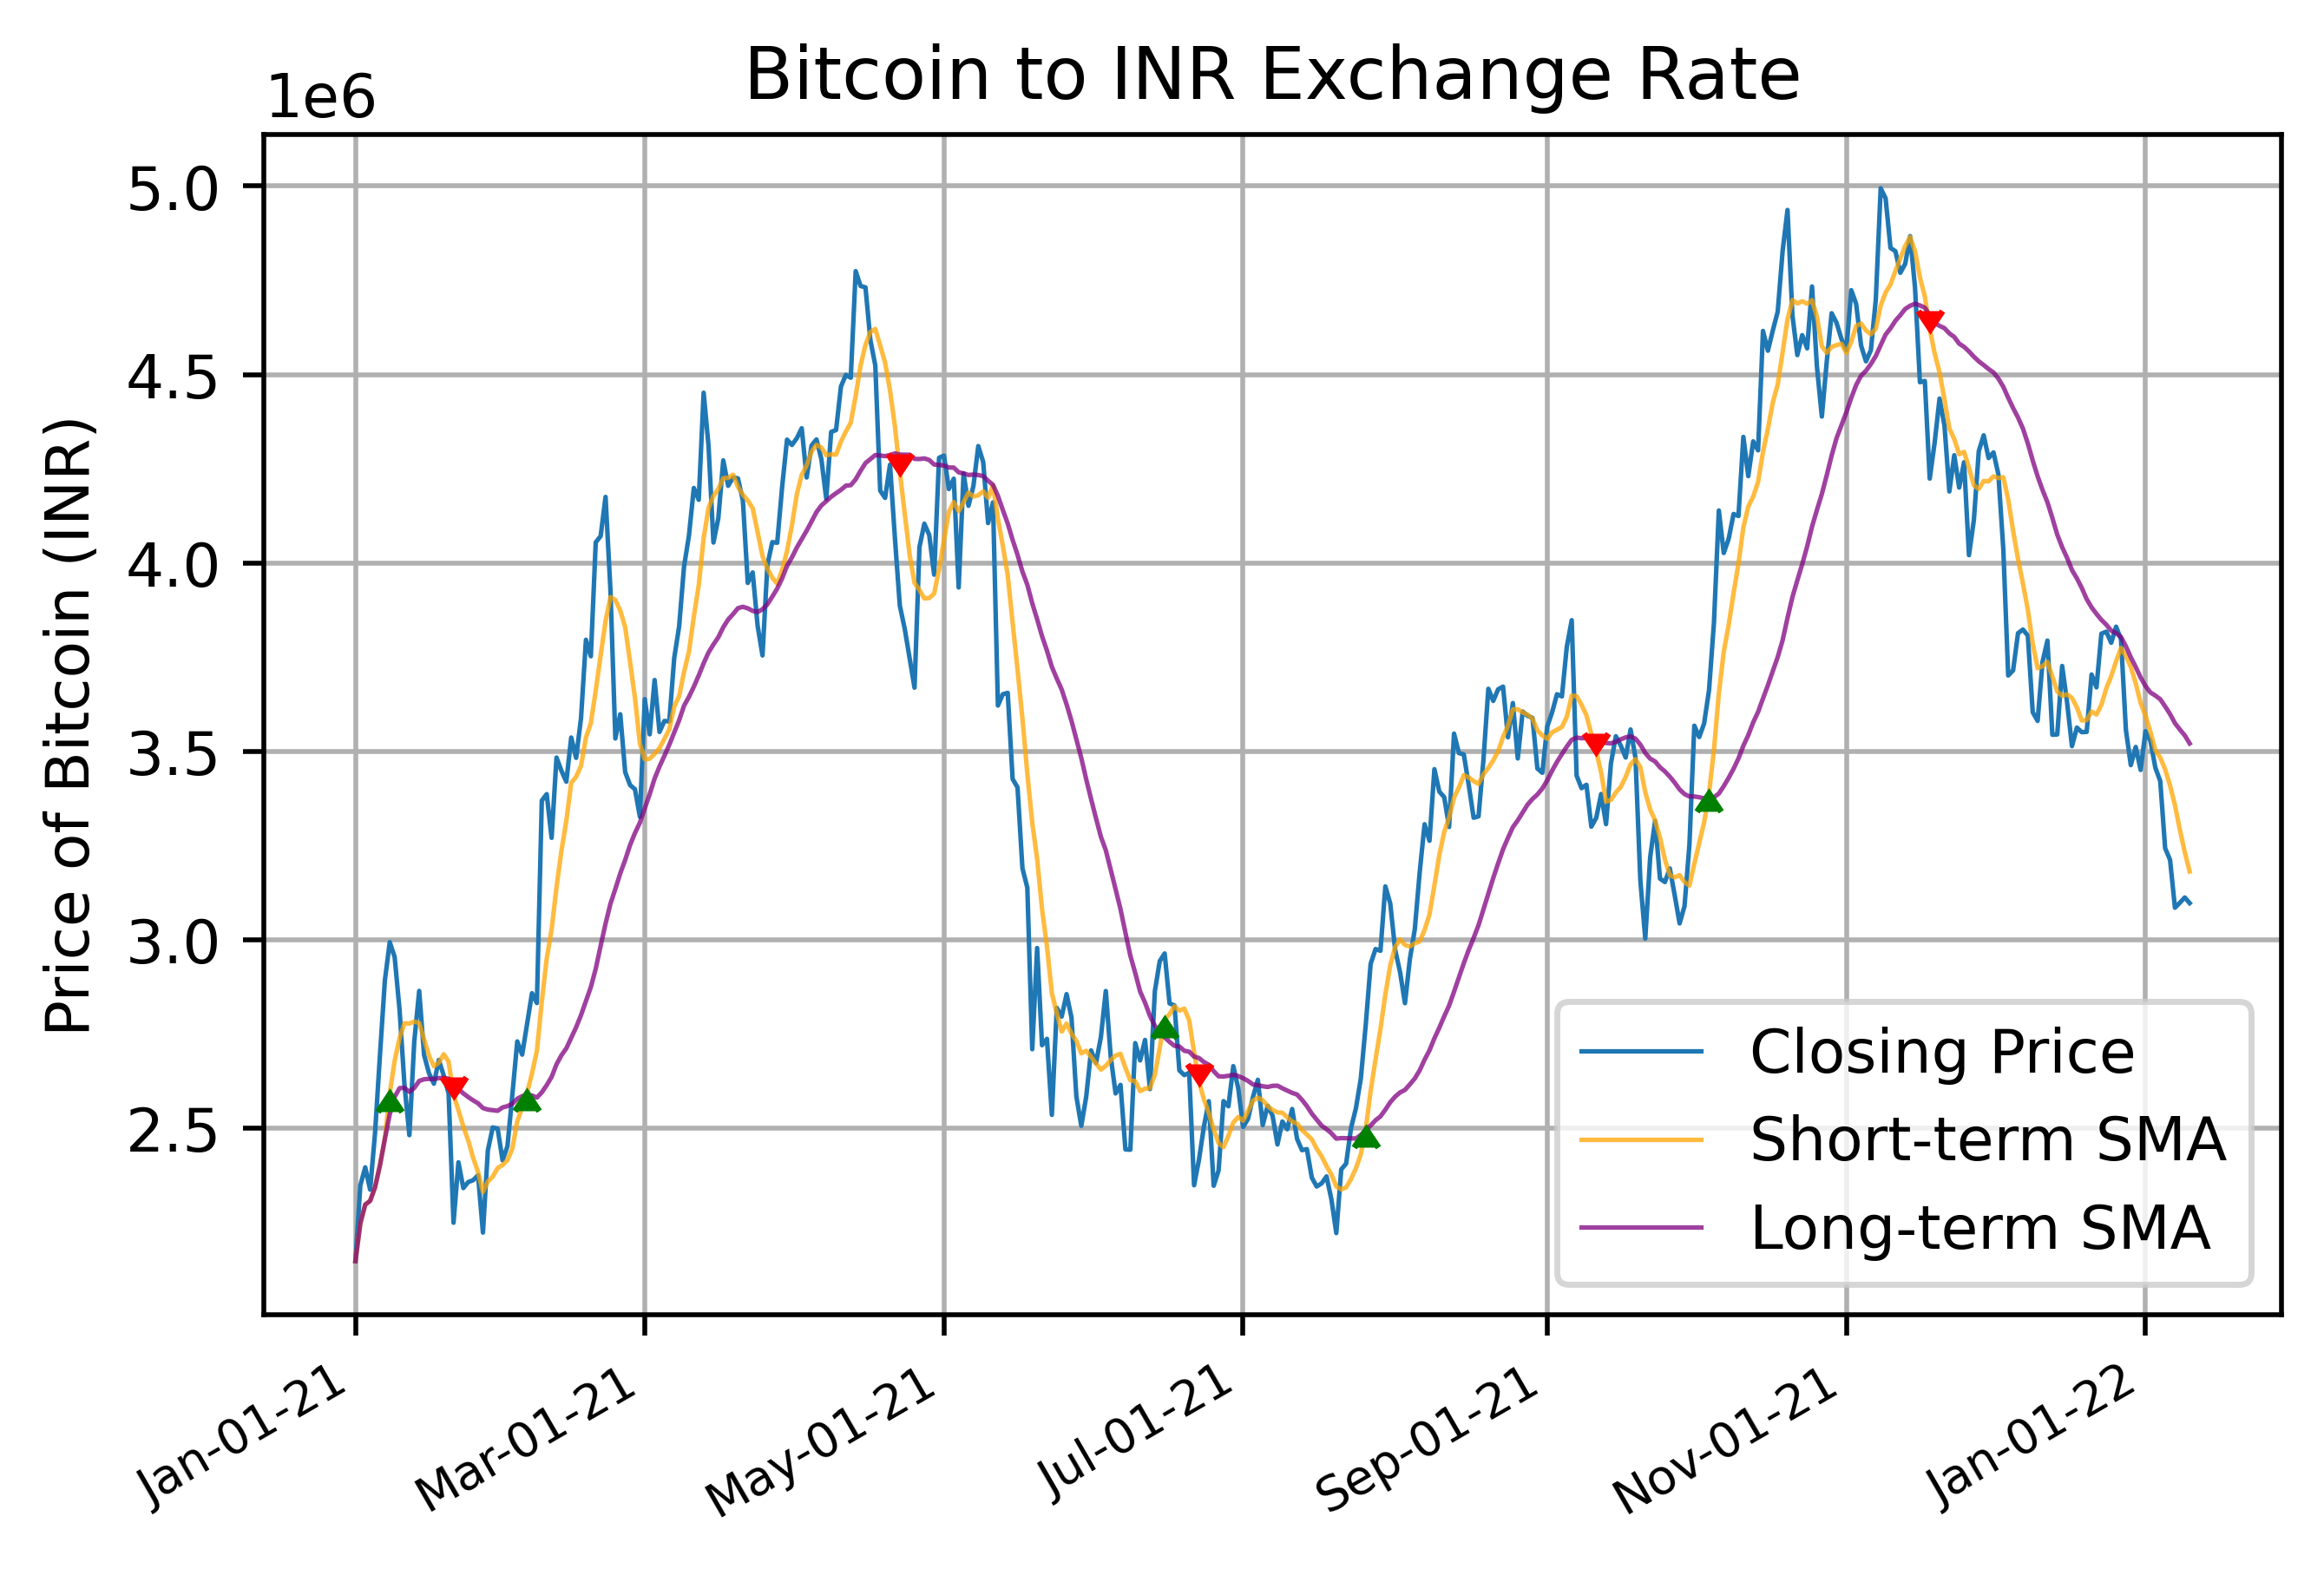

In [85]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_INR['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (INR)')
ax.set_title('Bitcoin to INR Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [86]:
# Define how much money you will start with (in INR)
initial_balance = 10000.0 # ten thousand INR

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_INR['Close'] / BTC_INR['Close'].shift(1) # Current closing price / yesterday's closing price


In [87]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

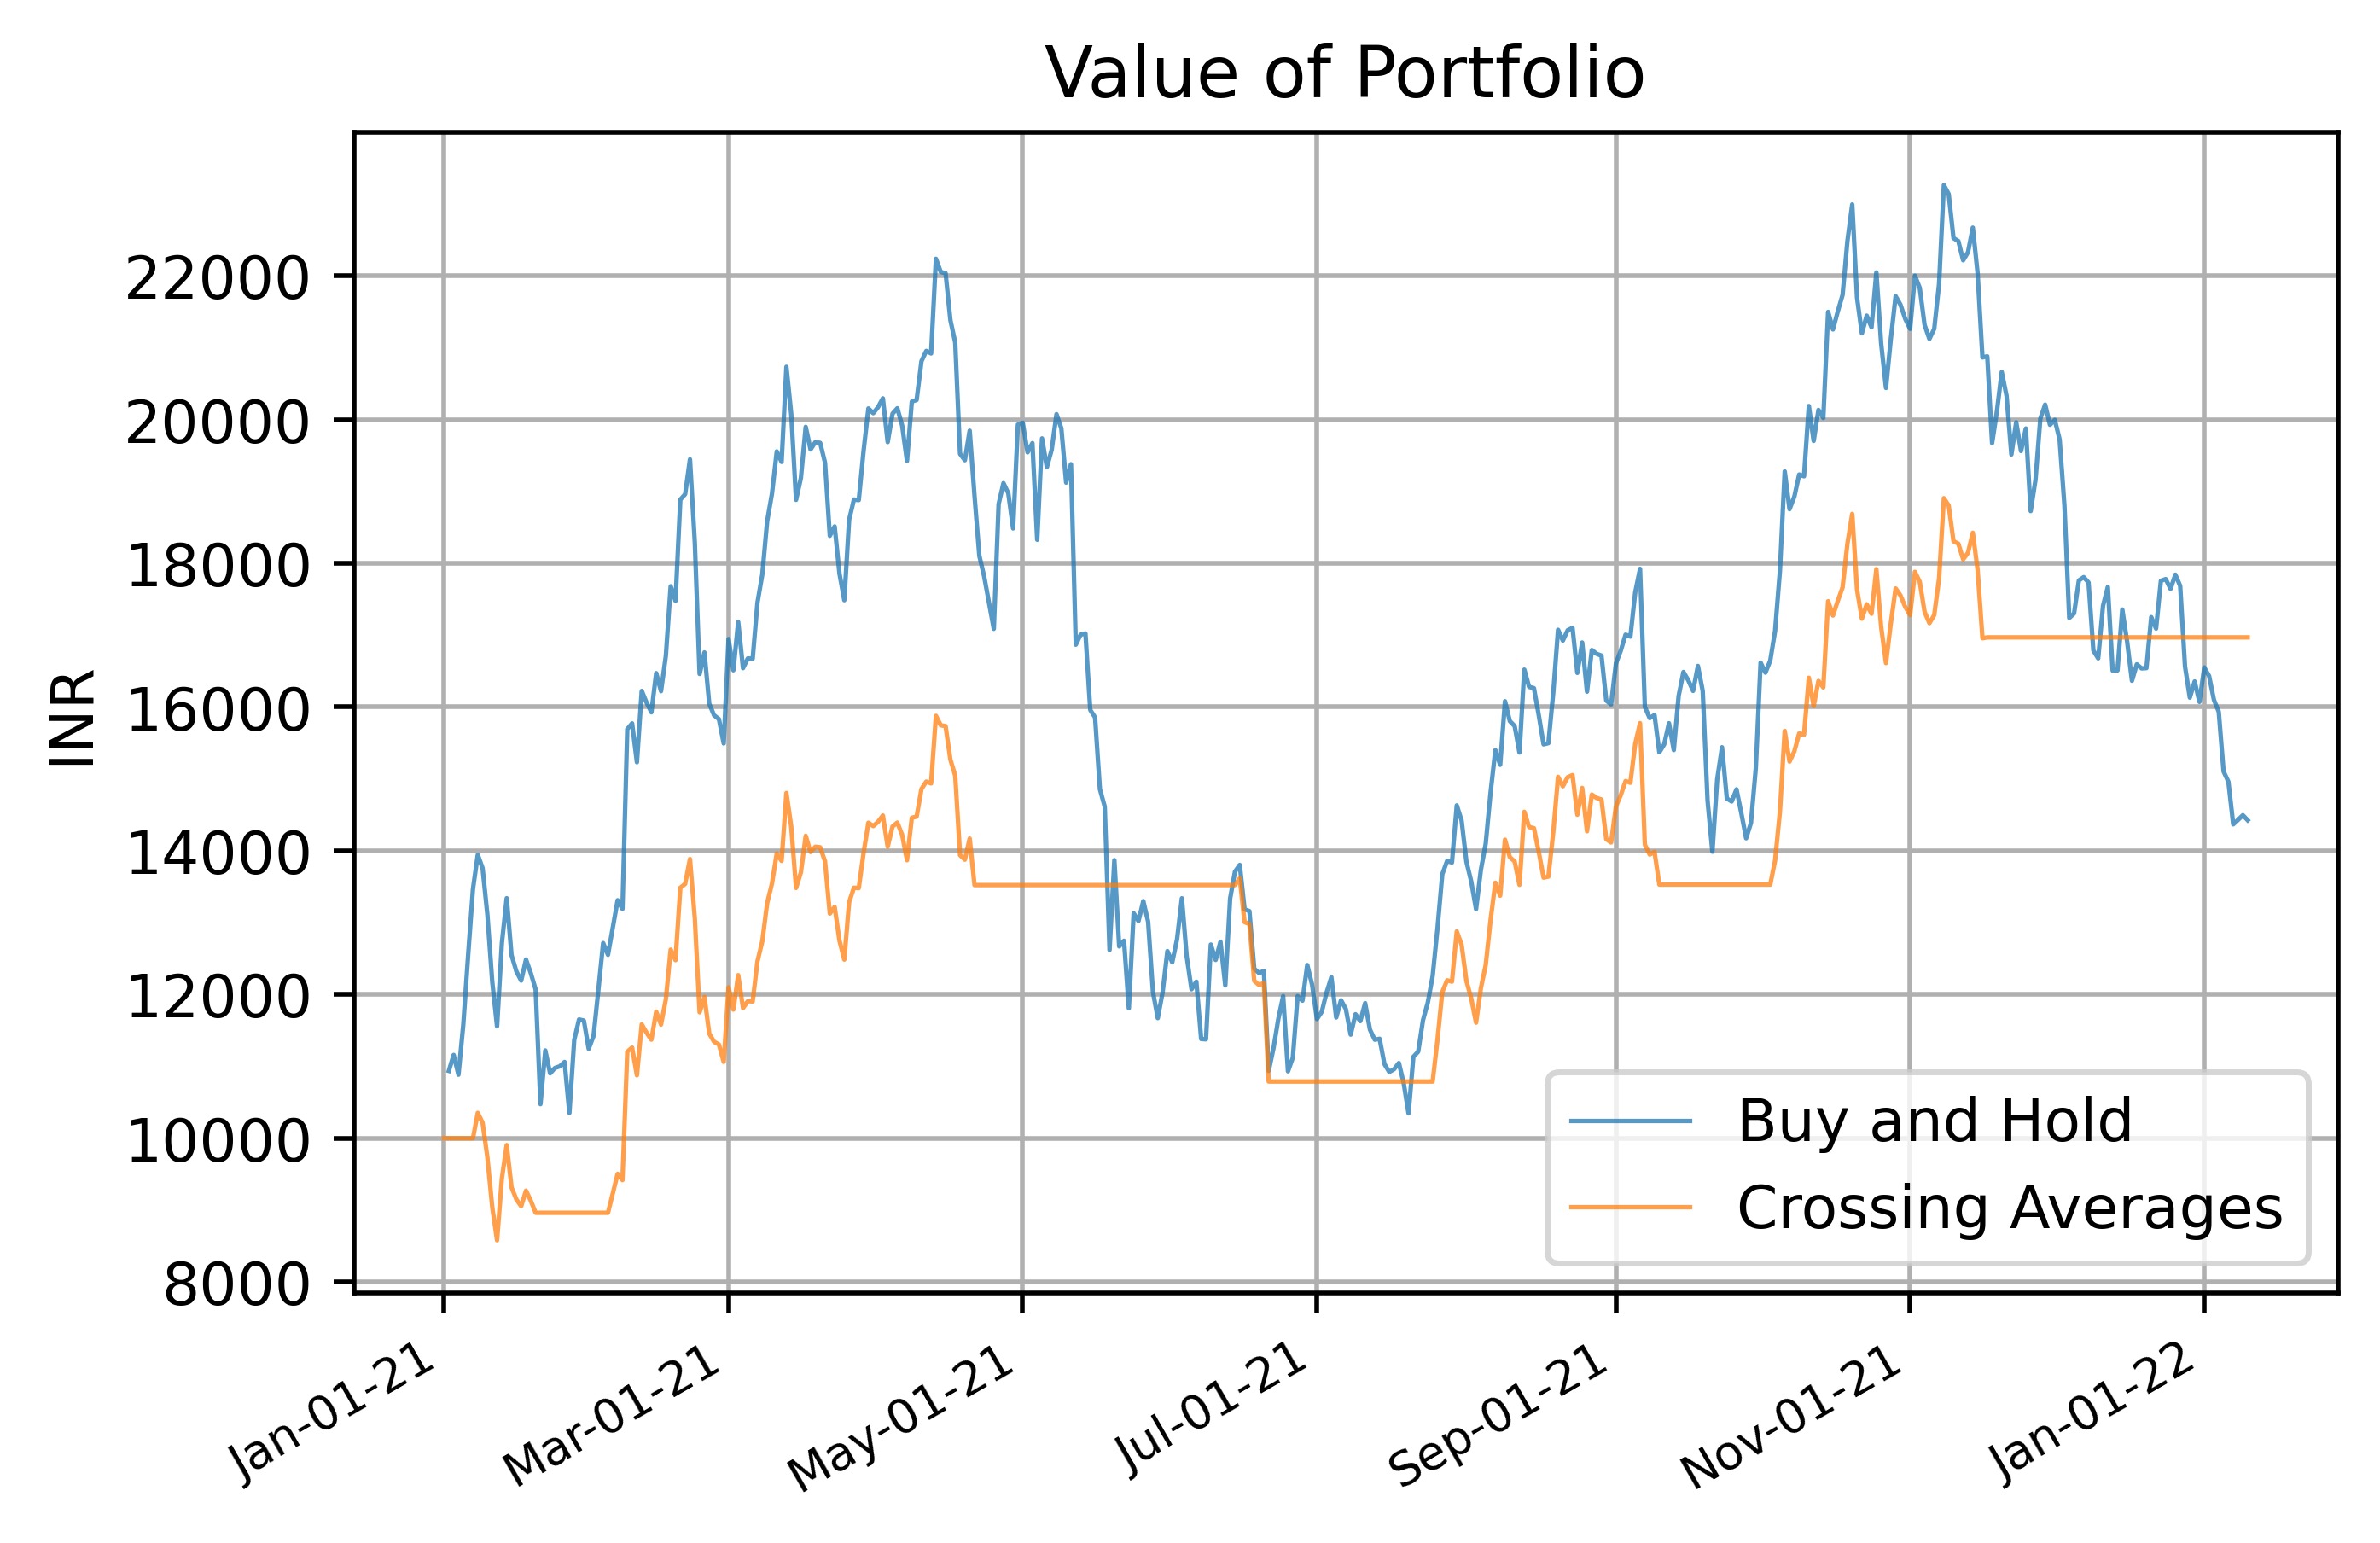

In [88]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('INR')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()